# 库的引入

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tushare as ts

from datetime import datetime
import matplotlib.dates as mdates
import mplfinance as mpf

import json
import requests

#画图时显示中文，使用微软雅黑字体，画图时显示负号
from pylab import mpl
mpl.rcParams['font.sans-serif']=['SimHei']
mpl.rcParams['axes.unicode_minus']=False
# %matplotlib inline

# 获取浦发银行（600000）的股票数据

本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


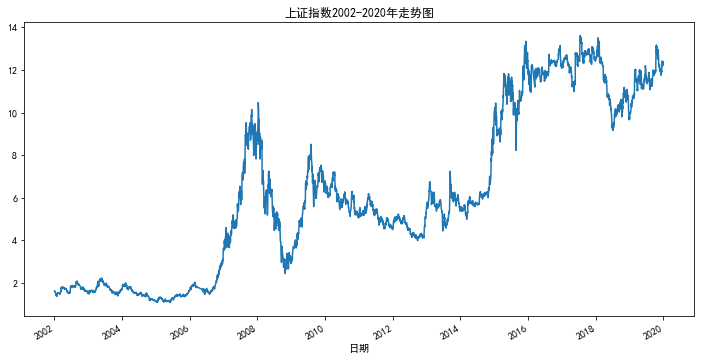

In [2]:
sh=ts.get_k_data(code='600000',start='2002-01-01',end='2019-12-31',
             ktype='D',autype='qfq')
sh.index=pd.to_datetime(sh.date)  #将数据列表中第0列‘date'设置为索引
#画出上证指数收盘价的走势
sh['close'].plot(figsize=(12,6))
plt.title('上证指数2002-2020年走势图')
plt.xlabel('日期')
plt.show()


从上图可以看出，股指在2007年末迎来一波牛市，随后下跌。 在2015年开始，股指不断攀升，并维持在较高的水平

# 描述性统计

In [3]:
#pandas的describe()函数提供了数据的描述性统计
#count:数据样本，mean:均值，std:标准差
print(sh.describe().round(2))

          open    close     high      low       volume
count  4252.00  4252.00  4252.00  4252.00      4252.00
mean      6.22     6.22     6.31     6.14    626329.96
std       3.85     3.85     3.89     3.82    941260.86
min       1.08     1.08     1.11     1.07      2711.20
25%       2.06     2.06     2.09     2.02    138233.76
50%       5.61     5.61     5.70     5.53    332629.02
75%      10.06    10.05    10.16     9.93    718903.01
max      13.53    13.62    13.87    13.39  11980241.00


从表中可以看到，股票的开盘价最高位13.53元/股，有75%的可能高于10.06元/股。

# 成交量与价格统计

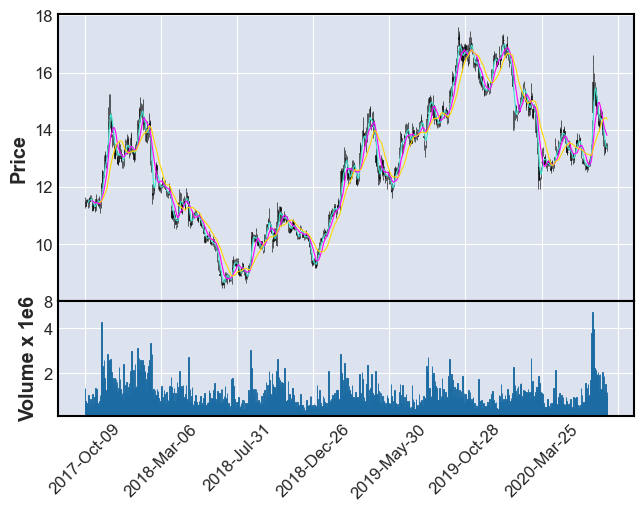

In [4]:
#pd.set_option()就是pycharm输出控制显示的设置
pd.set_option('expand_frame_repr', False)#True就是可以换行显示。设置成False的时候不允许换行
pd.set_option('display.max_columns', None)# 显示所有列
#pd.set_option('display.max_rows', None)# 显示所有行
pd.set_option('colheader_justify', 'centre')# 显示居中

pro = ts.pro_api('b9a80d289f475234064f77d2dc42639289bbc92b90a2a816d9c32629')
mpl.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
df = pro.daily(ts_code='000001.SZ', start_date='20171001', end_date='20200801')
#df.sort_values(by='trade_date',ascending=False)
data = df.loc[:, ['trade_date', 'open', 'close', 'high', 'low', 'vol']]  #：取所有行数据，后面取date列，open列等数据
data = data.rename(columns={'trade_date': 'Date', 'open': 'Open', 'close': 'Close', 'high': 'High', 'low': 'Low', 'vol': 'Volume'})  #更换列名，为后面函数变量做准备
data.set_index('Date', inplace=True)  #设置date列为索引，覆盖原来索引,这个时候索引还是 object 类型，就是字符串类型。
data.index = pd.DatetimeIndex(data.index)  #将object类型转化成 DateIndex 类型，pd.DatetimeIndex 是把某一列进行转换，同时把该列的数据设置为索引 index。
data = data.sort_index(ascending=True)  #将时间顺序升序，符合时间序列
mpf.plot(data, type='candle', mav=(5, 10, 20), volume=True, show_nontrading=False)


上图的成交量反映了一个有趣的现象，2014-2015年的大牛市很可能是天量的交易推动起来的，因为这期间实体经济并不景气，央行多次降息降准，货币宽松，资金流入股市，银行理财等影子银行在这期间疯狂扩张，场外加杠杆和配资主导了这一场牛市。感兴趣的朋友可以结合货币供给、实体经济指标、影子银行等数据一起分析，进行交叉验证

# 均线分析—20，52，252日均线

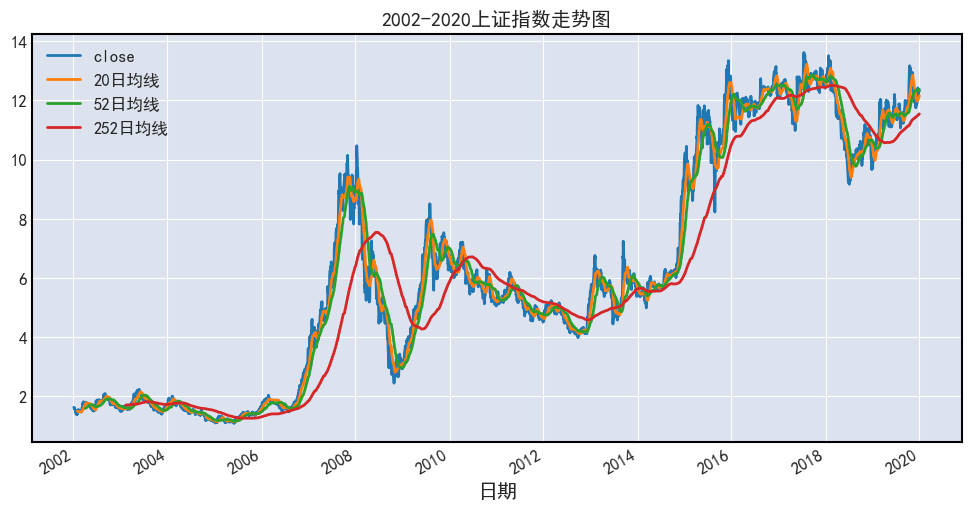

In [5]:
#重新设置字体
mpl.rcParams['font.sans-serif']=['SimHei']
mpl.rcParams['axes.unicode_minus']=False
#这里的平均线是通过自定义函数，手动设置20,52,252日均线
#移动平均线：
ma_day = [20,52,252]

for ma in ma_day:
    column_name = "%s日均线" %(str(ma))
    sh[column_name] =sh["close"].rolling(ma).mean()
#sh.tail(3)
#画出2002年以来收盘价和均线图
sh.loc['2002-01-01':][["close",
"20日均线","52日均线","252日均线"]].plot(figsize=(12,6))
plt.title('2002-2020上证指数走势图')
plt.xlabel('日期')
plt.show()

# 日收益率可视化

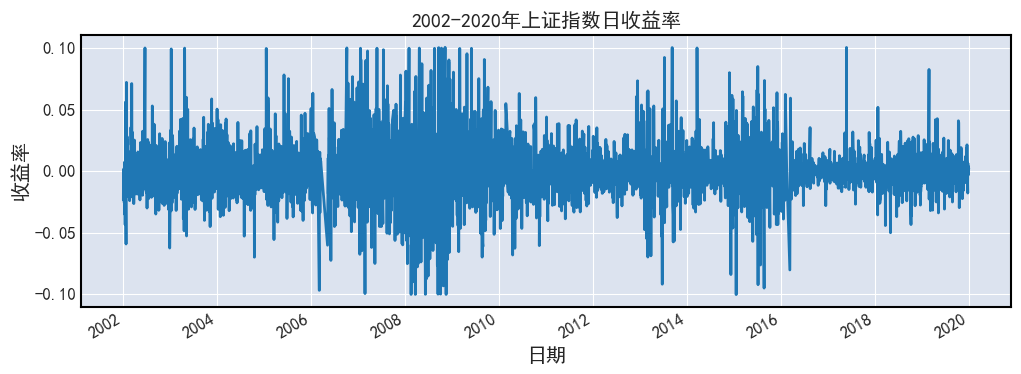

In [6]:
sh["日收益率"] = sh["close"].pct_change()
sh["日收益率"].loc['2002-01-01':].plot(figsize=(12,4))
plt.xlabel('日期')
plt.ylabel('收益率')
plt.title('2002-2020年上证指数日收益率')
plt.show()

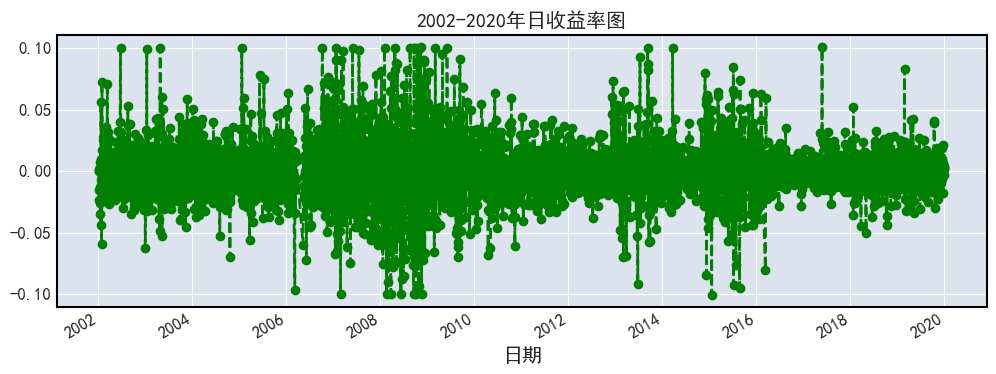

In [7]:
###这里我们改变一下线条的类型
#(linestyle)以及加一些标记(marker)
sh["日收益率"].loc['2002-01-01':].plot(figsize=
(12,4),linestyle="--",marker="o",color="g")
plt.title('2002-2020年日收益率图')
plt.xlabel('日期')
plt.show()

# 分析多支股票（指数）相关性

本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


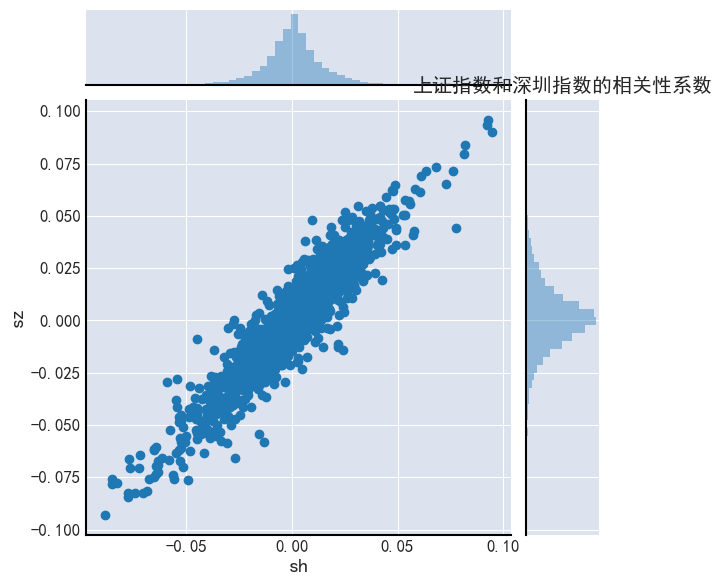

In [8]:
#分析下常见的几个股票指数
stocks={'上证指数':'sh','深证指数':'sz','沪深300':'hs300',
        '上证50':'sz50','中小板指':'zxb','创业板':'cyb'}
stock_index=pd.DataFrame()
for stock in stocks.values():
    stock_index[stock]=ts.get_k_data(stock,ktype='D',
autype='qfq', start='2002-01-01')['close']
#stock_index.head()
#计算这些股票指数每日涨跌幅
tech_rets = stock_index.pct_change()[1:]
#tech_rets.head()
#收益率描述性统计
tech_rets.describe()
#结果不在此报告
#均值其实都大于0
tech_rets.mean()*100 #转换为%
#jointplot这个函数可以画出两个指数的”相关性系数“，或者说皮尔森相关系数
sns.jointplot('sh','sz',data=tech_rets)
plt.title('上证指数和深圳指数的相关性系数')
plt.show()

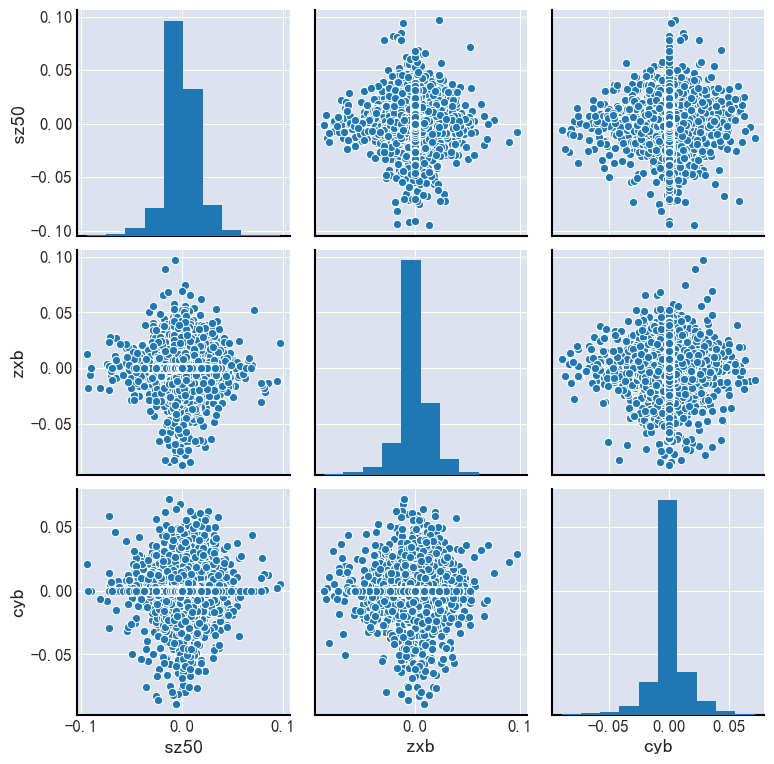

In [9]:
#成对的比较不同数据集之间的相关性，
#而对角线则会显示该数据集的直方图
sns.pairplot(tech_rets.iloc[:,3:].dropna())
plt.show()

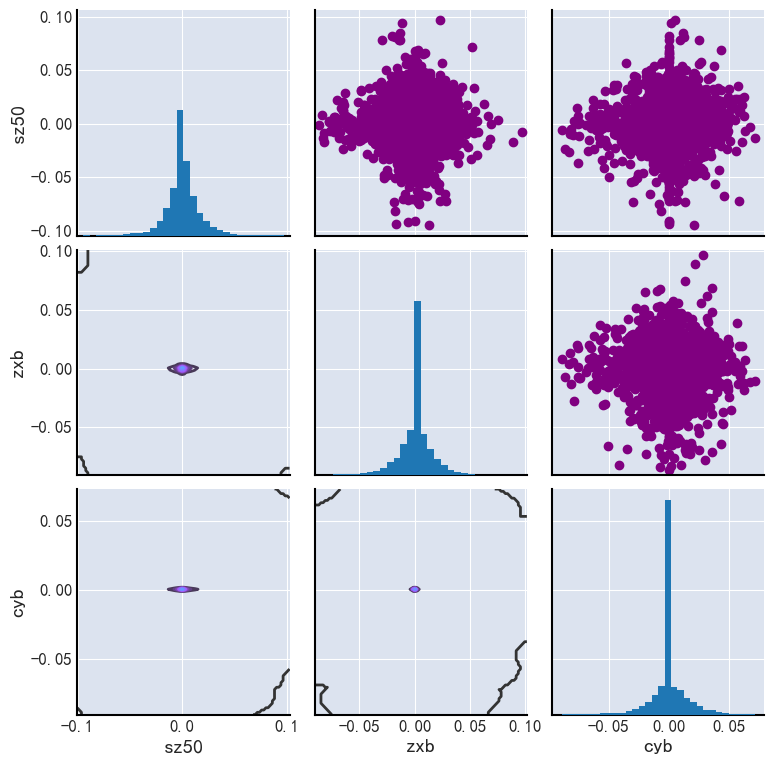

In [10]:
returns_fig = sns.PairGrid(tech_rets.iloc[:,3:].dropna())
###右上角画散点图
returns_fig.map_upper(plt.scatter,color="purple")
###左下角画核密度图
returns_fig.map_lower(sns.kdeplot,cmap="cool_d")
###对角线的直方图
returns_fig.map_diag(plt.hist,bins=30)
plt.show()

# 收益率与风险

本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


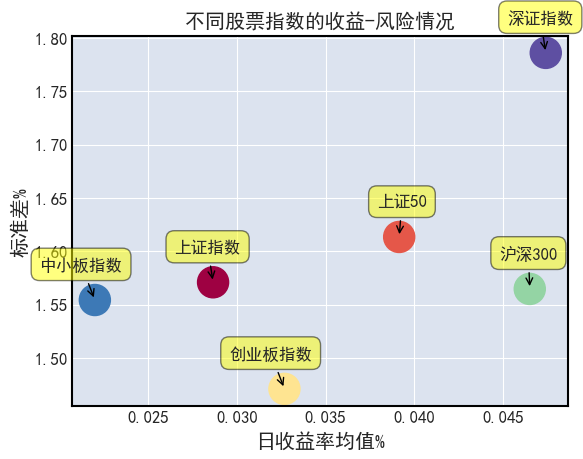

In [11]:
#构建一个计算股票收益率和标准差的函数
#默认起始时间为'2002-01-01'
def return_risk(stocks,startdate='2002-01-01'):
    close=pd.DataFrame()
    for stock in stocks.values():
        close[stock]=ts.get_k_data(stock,ktype='D',
     autype='qfq', start=startdate)['close']
    tech_rets = close.pct_change()[1:]
    rets = tech_rets.dropna()
    ret_mean=rets.mean()*100
    ret_std=rets.std()*100
    return ret_mean,ret_std

#画图函数
def plot_return_risk(stocks):
    ret,vol=return_risk(stocks)
    color=np.array([ 0.18, 0.96, 0.75, 0.3, 0.9,0.5])
    plt.scatter(ret, vol, marker = 'o',
    c=color,s = 500,cmap=plt.get_cmap('Spectral'))
    plt.xlabel("日收益率均值%")
    plt.ylabel("标准差%")
    for label,x,y in zip(stocks.keys(),ret,vol):
        plt.annotate(label,xy = (x,y),xytext = (20,20),
            textcoords = "offset points",
             ha = "right",va = "bottom",
            bbox = dict(boxstyle = 'round,pad=0.5',
            fc = 'yellow', alpha = 0.5),
                arrowprops = dict(arrowstyle = "->",
                    connectionstyle = "arc3,rad=0"))
stocks={'上证指数':'sh','深证指数':'sz','沪深300':'hs300',
        '上证50':'sz50','中小板指数':'zxb','创业板指数':'cyb'}
plot_return_risk(stocks)
plt.title("不同股票指数的收益-风险情况")
plt.show()

本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


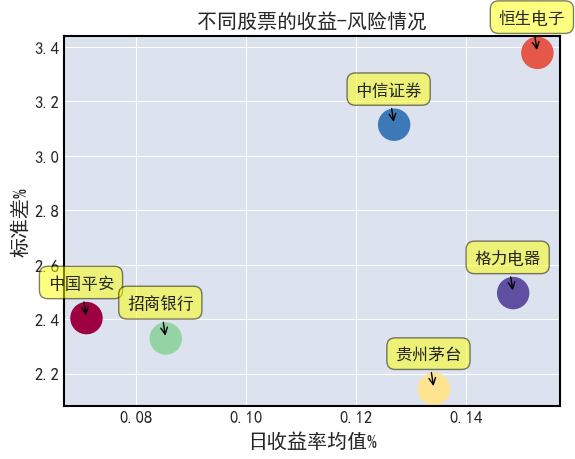

In [12]:
stocks1={'中国平安':'601318','格力电器':'000651',
        '招商银行':'600036','恒生电子':'600570',
        '中信证券':'600030','贵州茅台':'600519'}
startdate='2018-01-01'
plot_return_risk(stocks1)
plt.title("不同股票的收益-风险情况")
plt.show()

# 蒙特卡洛模拟分析

In [13]:
df=ts.get_k_data(code='600000',start='2002-01-01',end='2019-12-31',
             ktype='D',autype='qfq')
df.index=pd.to_datetime(df.date)
tech_rets1 = df.close.pct_change()[1:]
rets1= tech_rets1.dropna()
#rets1.head()
#下面的结果说明，我们95%的置信，一天我们不会损失超过0.0264...
print("下面结果说明，我们有95%的置信，认为"
      "一天我们的损失不会超过{:}".format(-rets1.quantile(0.05)))

本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2
下面结果说明，我们有95%的置信，认为一天我们的损失不会超过0.03162439463412697



结果说明，我们有95%的置信，认为一天我们的损失不会超过0.03162439463412697

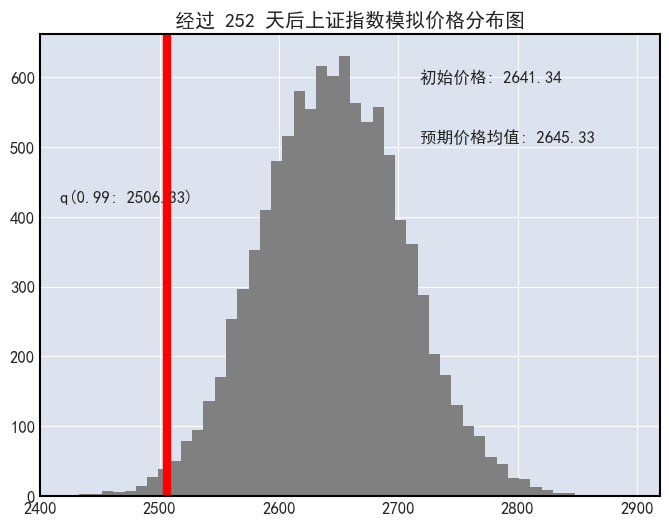

In [14]:
def monte_carlo(start_price,days,mu,sigma):
    dt=1/days
    price = np.zeros(days)
    price[0] = start_price
    shock = np.zeros(days)
    drift = np.zeros(days)

    for x in range(1,days):
        shock[x] = np.random.normal(loc=mu * dt,
                scale=sigma * np.sqrt(dt))
        drift[x] = mu * dt
        price[x] = price[x-1] + (price[x-1] *
                (drift[x] + shock[x]))
    return price
#模拟次数
runs = 10000
start_price = 2641.34 #今日收盘价
days = 252
mu=rets1.mean()
sigma=rets1.std()
simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = monte_carlo(start_price,
      days,mu,sigma)[days-1]
q = np.percentile(simulations,1)
plt.figure(figsize=(8,6))
plt.hist(simulations,bins=50,color='grey')
plt.figtext(0.6,0.8,s="初始价格: %.2f" % start_price)
plt.figtext(0.6,0.7,"预期价格均值: %.2f" %simulations.mean())
plt.figtext(0.15,0.6,"q(0.99: %.2f)" %q)
plt.axvline(x=q,linewidth=6,color="r")
plt.title("经过 %s 天后上证指数模拟价格分布图" %days,weight="bold")
plt.show()

实际上蒙特卡洛模拟在期权定价里面还是很有用的。我们借用期权定价里对未来股票走势的假定来进行蒙特卡洛模拟。

In [15]:
from time import time
np.random.seed(2018)
t01=time()
S01=2641.34
T1=1.0
r1=0.05
sigma1=rets1.std()
M1=50
dt=T1/M1
I=250000
S2=np.zeros((M1+1,I))
S2[0]=S01
for t in range(1,M1+1):
    z=np.random.standard_normal(I)
    S2[t]=S2[t-1]*np.exp((r1-0.5*sigma1**2)*dt+
          sigma1*np.sqrt(dt)*z)
s_m=np.sum(S2[-1])/I
tnp1=time()-t01
print("经过250000次模拟，得出1年后上证指数的预期"
      "平均收盘价为{:.2f}".format(s_m))

经过250000次模拟，得出1年后上证指数的预期平均收盘价为2776.88


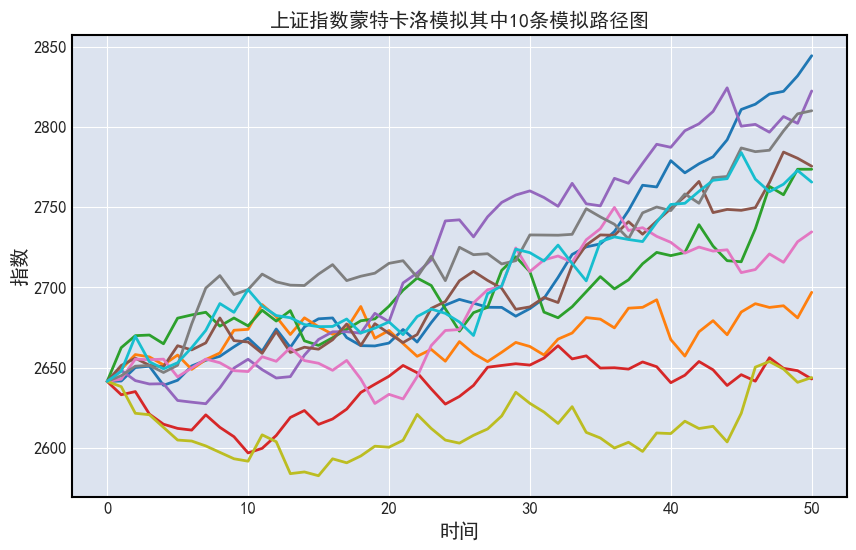

In [16]:
plt.figure(figsize=(10,6))
plt.plot(S2[:,:10])
plt.grid(True)
plt.title('上证指数蒙特卡洛模拟其中10条模拟路径图')
plt.xlabel('时间')
plt.ylabel('指数')
plt.show()

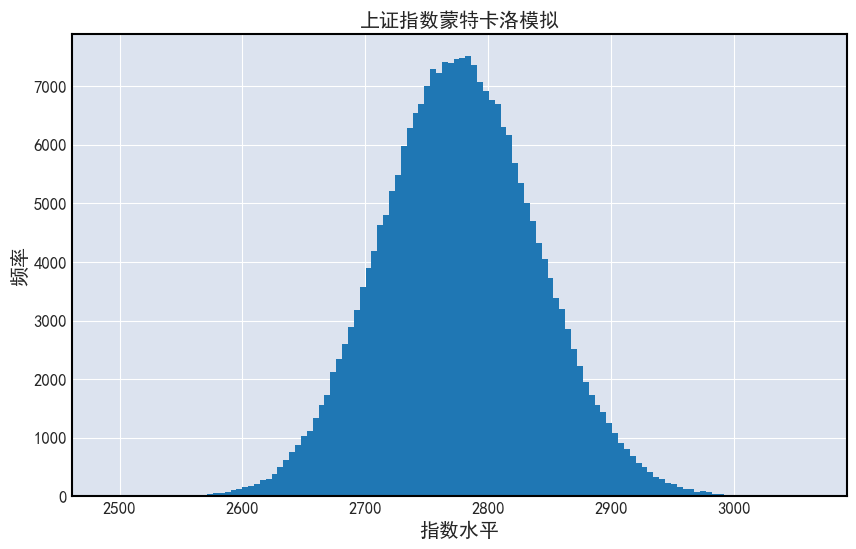

In [17]:
plt.figure(figsize=(10,6))
plt.hist(S2[-1], bins=120)
plt.grid(True)
plt.xlabel('指数水平')
plt.ylabel('频率')
plt.title('上证指数蒙特卡洛模拟')
plt.show()